In [1]:
import pandas as pd
a=pd.read_csv('/content/Training.csv')
print(a)
print(a.isnull())
a=a.fillna(0)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [2]:
import pandas as pd
c={'True':1,'False':0}
a=a.replace(c)
dropping=['Unnamed: 133']
d=a.drop(columns=dropping)
print(d)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [3]:
y=a["prognosis"]
print(y)

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object


In [4]:
x=d.drop("prognosis", axis=1)
print(x)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

(array([[4242.,    0.,    0., ...,    0.,    0.,  678.],
        [4134.,    0.,    0., ...,    0.,    0.,  786.],
        [4812.,    0.,    0., ...,    0.,    0.,  108.],
        ...,
        [4806.,    0.,    0., ...,    0.,    0.,  114.],
        [4806.,    0.,    0., ...,    0.,    0.,  114.],
        [4806.,    0.,    0., ...,    0.,    0.,  114.]]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 132 BarContainer objects>)

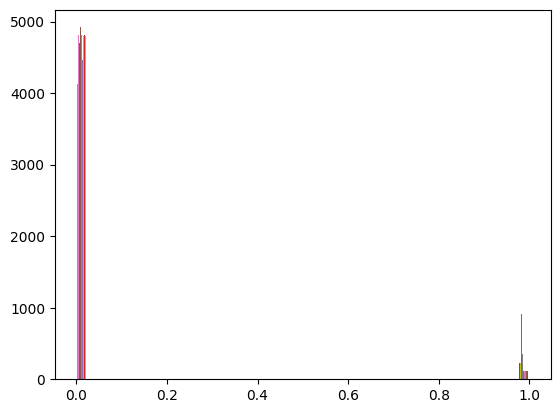

In [5]:
import matplotlib.pyplot as plt
plt.hist(x,40)

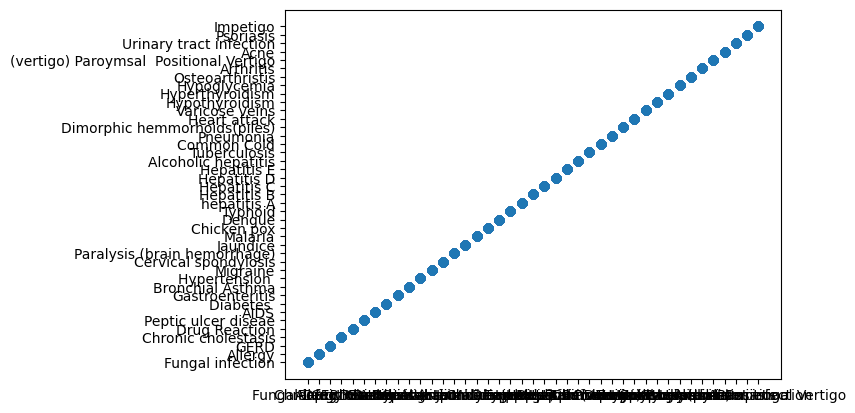

In [6]:
plt.scatter(y,y)

In [ ]:
import plotly.express as px
disease_counts = a['prognosis'].value_counts().reset_index()
disease_counts.columns = ['prognosis', 'Count']
fig = px.pie(disease_counts,
             values= 'Count',
             names= 'prognosis',
             color_discrete_sequence= px.colors.sequential.Reds_r,
             title= 'Disease Distribution')
fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
#logistric regression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.29,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

Accuracy: 1.0


In [ ]:
#SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 1.0


In [ ]:
#percerpton learning
import numpy as np
x1 = np.random.rand(20, 15)
w=[-0.5,-0.2,-0.7,0.9,-0.5,0.6,-0.9,0.7,-0.8,-0.3,-0.8,0.1,-0.7,0.2,-0.6]

def perceptron(w, x1, b):
    yp = []
    for i in range(len(x1)):
        s = np.dot(x1[i], w) + b
        s2 = 1 / (1 + np.exp(-s))
        if s2 >= 0.5:
            yp.append(1)
        else:
            yp.append(0)
    return yp
b= float(input("enter b:"))
predicted_values = perceptron(w, x1, b)
print(predicted_values)

enter b:2
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]


In [10]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [26]:
from sklearn.decomposition import PCA
pca=PCA(4)
x1=pca.fit_transform(x)
print(x1)
print(x1.shape)
print(y.shape)

[[-0.71980271 -0.3466156  -0.26598288 -0.67721148]
 [-0.79505389 -0.28166044 -0.33029346 -0.45795906]
 [-0.67269254 -0.36281151 -0.14569545 -0.51327445]
 ...
 [-0.81991236 -0.33042665 -0.24912797 -0.33372084]
 [-0.66878502 -0.42470113 -0.47600588 -0.50553778]
 [-0.60063818  0.06487296 -0.47287793 -0.50140486]]
(4920, 4)
(4920,)


In [23]:
#logistric regression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size=0.29,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracy)

Accuracy: 0.9060967063770147


In [24]:
#SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x1,y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9034552845528455


In [25]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)
k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9661246612466124
